In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the data

df = pd.read_csv('/content/Uber Request Data.csv')

In [3]:
# Print shape of the dataset (Rows, Cols)

df.shape

(6745, 6)

In [4]:
# What all columns do we have?

df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [5]:
# Change column names

df.columns = ['Request_ID','Pickup_Point','Driver_ID','Status','Request_Timestamp','Drop_Timestamp']

In [6]:
# display first 5 rows to see the data

df.head()

,Request_ID,Pickup_Point,Driver_ID,Status,Request_Timestamp,Drop_Timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [7]:
# check what all data type each column has

df.dtypes

Request_ID             int64
Pickup_Point          object
Driver_ID            float64
Status                object
Request_Timestamp     object
Drop_Timestamp        object
dtype: object

In [8]:
# Convert the timestamp column/s which is string to datetime object

df["Request_Timestamp"] = pd.to_datetime(df["Request_Timestamp"], errors='coerce')
df["Drop_Timestamp"] = pd.to_datetime(df["Drop_Timestamp"], errors='coerce')

In [9]:
# extract the hour from the timestamps for plotting

df["Request_Hour"] = df["Request_Timestamp"].dt.hour
df["Drop_Hour"] = df["Drop_Timestamp"].dt.hour

In [10]:
# Delete Request Timestamp and Drop Timestamp columns (not needed)

df.drop(['Request_Timestamp', 'Drop_Timestamp'], axis='columns', inplace=True)
df

,Request_ID,Pickup_Point,Driver_ID,Status,Request_Hour,Drop_Hour
0,619,Airport,1.0,Trip Completed,11,13.0
1,867,Airport,1.0,Trip Completed,17,18.0
2,1807,City,1.0,Trip Completed,9,9.0
3,2532,Airport,1.0,Trip Completed,21,22.0
4,3112,City,1.0,Trip Completed,8,9.0
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,23,NaN
6741,6752,Airport,NaN,No Cars Available,23,NaN
6742,6751,City,NaN,No Cars Available,23,NaN
6743,6754,City,NaN,No Cars Available,23,NaN


In [11]:
# Filter all the cancelled trips from the data

cancelled_trips = df[df['Status'] == 'Cancelled']

In [12]:
# no of cancelled trips

cancelled_trips.shape

(1264, 6)

In [13]:
# Filter all the trips where cars were not available from this data

no_cars_available = df[df['Status'] == 'No Cars Available']

In [14]:
# no. of no car avilable trips

no_cars_available.shape

(2650, 6)

In [15]:
# Filter all the completed trips from the data

completed_trips = df[df['Status'] == 'Trip Completed']

In [16]:
# no. of completed trips

completed_trips.shape

(2831, 6)

In [17]:
# get all the unique status values

df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd1e1eda580>,
 [Text(0.9148122117335421, 0.6108343615606322, 'Cancelled'),
  Text(-0.8197978372292601, 0.7334381405914392, 'No Cars Available'),
  Text(0.27450168572516787, -1.0651989600699212, 'Trip Completed')],
 [Text(0.49898847912738653, 0.3331823790330721, '18.74%'),
  Text(-0.44716245667050547, 0.40005716759533044, '39.29%'),
  Text(0.1497281922137279, -0.5810176145835932, '41.97%')])

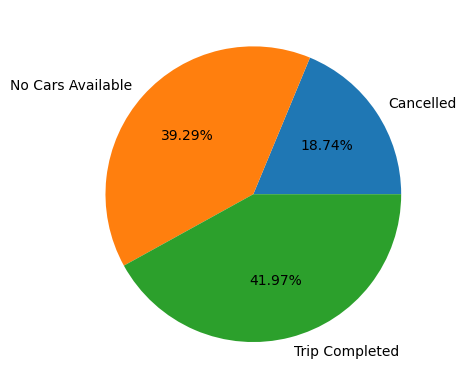

In [18]:
# Plot a pie chart to show the number of trips of each type

y = np.array([1264, 2650, 2831])
statuslabels = ["Cancelled", "No Cars Available", "Trip Completed"]
plt.pie(y, labels = statuslabels, autopct = '%2.2f%%')

([<matplotlib.patches.Wedge at 0x7fd1df5b8a60>,
 [Text(0.6587063113848798, 0.8809687822742223, 'Supply'),
  Text(-0.6587063113848801, -0.8809687822742219, 'Demand')],
 [Text(0.3592943516644798, 0.48052842669503026, '29.56%'),
  Text(-0.35929435166448004, -0.4805284266950301, '70.44%')])

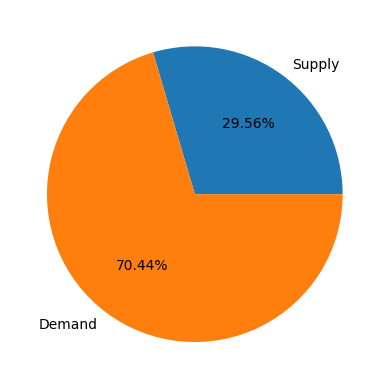

In [19]:
# Plot a bar chart to show the supply demand gap

x = ["Supply", "Demand"]
y = np.array([2831, 6745])
plt.pie(y, labels = x, autopct = '%2.2f%%')

In [21]:
# Convert the hours column to list format
# why convert?
# bcz for plotting we need list as arg for histogram

cancelled_hour = cancelled_trips['Request_Hour'].tolist()
notavailable_hour = no_cars_available['Request_Hour'].tolist()

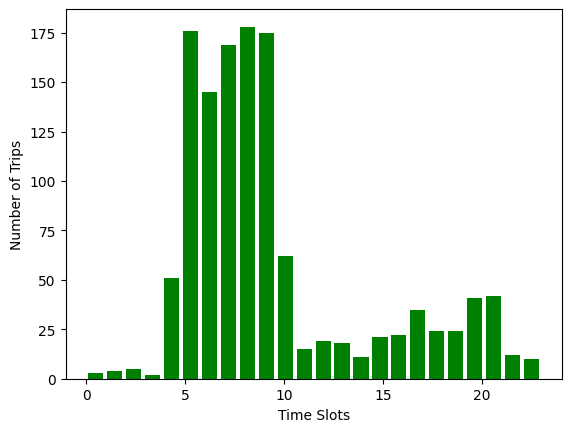

In [26]:
# Plot a histogram to show the time slots when trips got cancelled

range = (0, 23)
bins = 24     # intervals / buckets

#function for drawing histogram chart
def plots(q):
    plt.hist(q, bins, range, color = 'green', histtype = 'bar', rwidth = 0.8)
    plt.xlabel('Time Slots')
    plt.ylabel("Number of Trips")

plots(cancelled_hour)

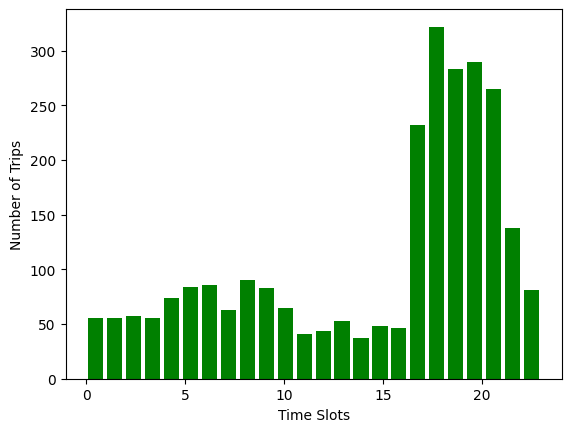

In [27]:
# Plot a histogram to show the time slots when cars were not available

plots(notavailable_hour)

In [ ]:
# Filter unsuccesful trips from city to airport

city_to_airport = df[(df.Status != 'Trip Completed') & (df.Pickup_Point == 'City')]
print(city_to_airport.shape)

(2003, 6)


In [ ]:
# Filter unsuccessful trips from airport to city

airport_to_city = df[(df.Status != 'Trip Completed') & (df.Pickup_Point == 'Airport')]
print(airport_to_city.shape)

(1911, 6)


([<matplotlib.patches.Wedge at 0x7f8711898d00>,
 [Text(0.04060517048133803, 1.0992502991267192, 'Failed Trips from Airport to City'),
  Text(-0.04060527340057912, -1.0992502953249839, 'Failed Trips from City to Airport')],
 [Text(0.022148274808002556, 0.5995910722509377, '48.82%'),
  Text(-0.022148330945770428, -0.5995910701772639, '51.18%')])

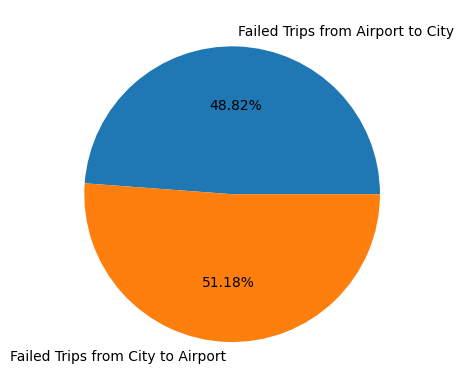

In [ ]:
# Plot a bar to show the gap between unsuccessful trips from city to airport and from airport to city

p = ["Failed Trips from Airport to City", "Failed Trips from City to Airport"]
q = np.array([1911, 2003])
plt.pie(q, labels = p, autopct = '%2.2f%%')

In [ ]:
# Filter cancelled trips from city to airport

city_to_airport_cancelled = df[(df.Status == 'Cancelled') & (df.Pickup_Point == 'City')]

In [ ]:
# Filter trips from city to airport when cars were not available

city_to_airport_not_available = df[(df.Status == 'No Cars Available') & (df.Pickup_Point == 'City')]

In [ ]:
# Filter cancelled trips from airport to city

airport_to_city_cancelled = df[(df.Status == 'Cancelled') & (df.Pickup_Point == 'Airport')]

In [ ]:
# Filter trips from airport to city when cars were not available

airport_to_city_not_available = df[(df.Status == 'No Cars Available') & (df.Pickup_Point == 'Airport')]

In [ ]:
# Convert the hours column to list format

city_to_airport_cancelled_hour = city_to_airport_cancelled['Request_Hour'].tolist()

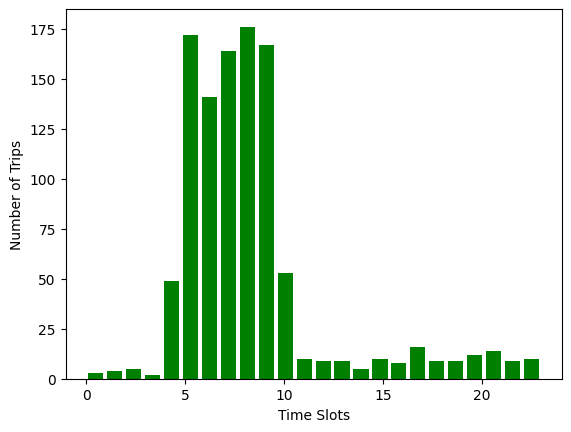

In [ ]:
# Plot a histogram to show the time slots when trip from city to airport got cancelled

plots(city_to_airport_cancelled_hour)

In [ ]:
# Convert the hours column to list format

city_to_airport_not_available_hour = city_to_airport_not_available['Request_Hour'].tolist()

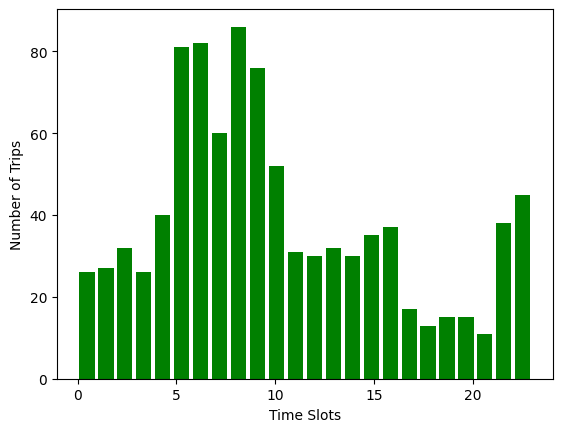

In [ ]:
# Plot a histogram to show the time slots when cars were not available for city to airport trip

plots(city_to_airport_not_available_hour)

In [ ]:
# Convert the hours column to list format

airport_to_city_cancelled_hour = airport_to_city_cancelled['Request_Hour'].tolist()

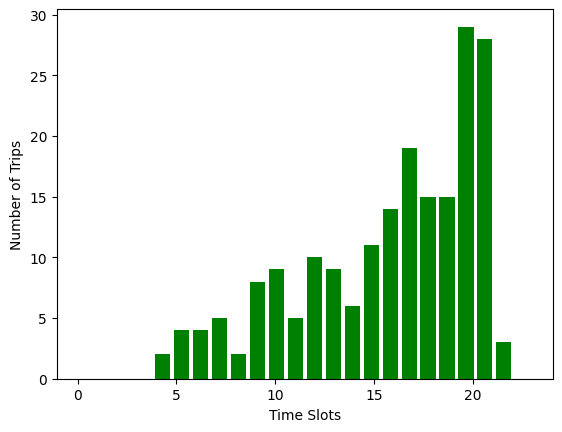

In [ ]:
# Plot a histogram to show the time slots when trip from airport to city got cancelled

plots(airport_to_city_cancelled_hour)

In [ ]:
# Convert the hours column to list format

airport_to_city_not_available_hour = airport_to_city_not_available['Request_Hour'].tolist()

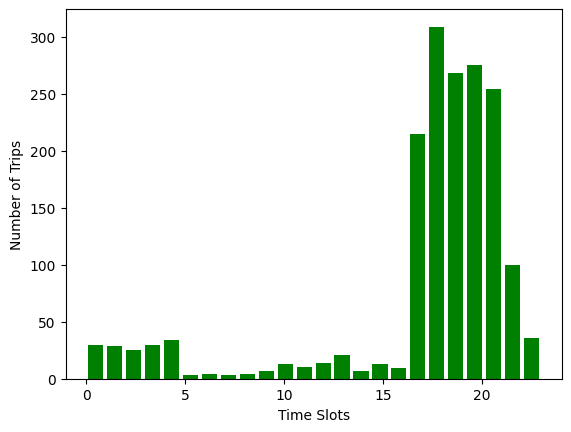

In [ ]:
# Plot a histogram to show the time slots when cars were not availabale for airport to city trip¶

plots(airport_to_city_not_available_hour)